In [1]:
import sys
import seaborn as sns
import numpy as np
import cnmf
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt


# Change path to wherever you have repo locally
sys.path.append('/oak/stanford/groups/engreitz/Users/ymo/Tools/cNMF_benchmarking/cNMF_benchmarking_pipeline')

from Plotting.src import program_corr,program_euclidean, top_genes_overlap,\
                         graph_cluster,graph_pdf_clustermap,max_gene_values_barplot,programs_dotplots,\
                         sort_corr_matrix

                                
from Plotting.src import convert_with_mygene, convert_adata_with_mygene, read_npz

/home/users/ymo/.local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
k = 100
program_loading_path = '/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Results/cNMF_100_07102024/consensus_NMF/consensus_NMF.usages.k_100.dt_0_2.consensus.txt'
mdata_path = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/original_code/analysis/240816_clustering_annotation_package/cNMF_100_0.2_preprocessed.h5mu"
gene_num = 300

# Program loading Dot plots

/home/users/ymo/.local/lib/python3.9/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 100 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


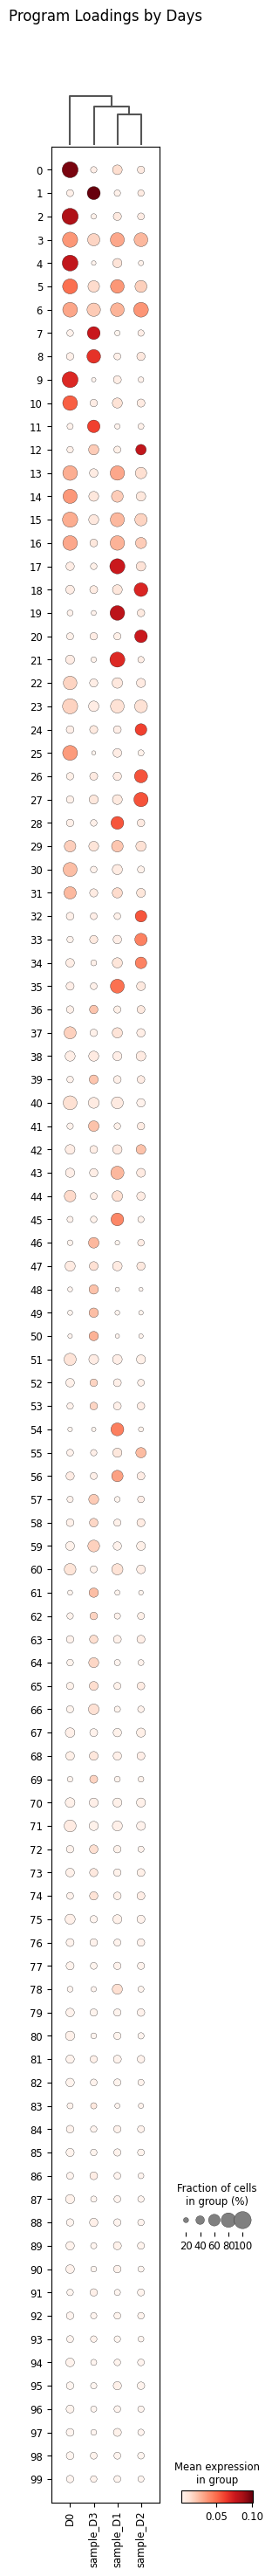

In [2]:
fig = programs_dotplots(mdata_path,program_loading_path)

# Clustermap on cNMF programs

In [52]:
# gene score matrix
halsv = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Results/torch-cNMF_evaluation/091625_100k_cells_10iter_torch_halsvar_batch_e7/cnmf_tmp/091625_100k_cells_10iter_torch_halsvar_batch_e7.gene_spectra_score.k_100.dt_2_0.df.npz"
cd = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Results/sk-cNMF_evaluation/091425_100k_10iter_1000batiter_Htol_sk_cd_frobenius/091425_100k_10iter_1000batiter_Htol_sk_cd_frobenius_all/cnmf_tmp/091425_100k_10iter_1000batiter_Htol_sk_cd_frobenius_all.gene_spectra_score.k_100.dt_2_0.df.npz"
df_halv = read_npz(halsv)
df_cd = read_npz(cd)

In [ ]:
overlap = top_genes_overlap(df_halv, df_cd, gene_num = gene_num, percentage  = False)
sorted_overlap = sort_corr_matrix(overlap)

# plot sorted program 
g = sns.clustermap(sorted_overlap, 
               row_cluster=False,   
               col_cluster=False,   
               cmap='coolwarm',      
               figsize=(5, 5), center = 0)     
               
g.fig.suptitle("top 300 genes between sk-cd and torch-halsvar gene score")
sorted_overlap.max().max()

In [61]:
# medium matrix 
halsv = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Results/torch-cNMF_evaluation/091625_100k_cells_10iter_torch_halsvar_batch_e7/091625_100k_cells_10iter_torch_halsvar_batch_e7.spectra.k_100.dt_2_0.consensus.txt"
cd = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Results/sk-cNMF_evaluation/091425_100k_10iter_1000batiter_Htol_sk_cd_frobenius/091425_100k_10iter_1000batiter_Htol_sk_cd_frobenius_all/091425_100k_10iter_1000batiter_Htol_sk_cd_frobenius_all.spectra.k_100.dt_2_0.consensus.txt"
df_halv = pd.read_csv(halsv, sep="\t" , index_col = 0)
df_cd = pd.read_csv(cd, sep="\t", index_col = 0)


Text(0.5, 0.98, 'top 300 genes between sk-cd and torch-halsvar median')

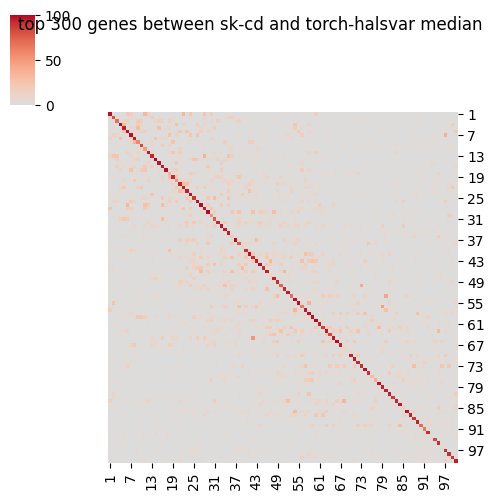

In [62]:
overlap = top_genes_overlap(df_halv, df_cd, gene_num = gene_num, percentage  = False)
sorted_overlap = sort_corr_matrix(overlap)

# plot sorted program 
g = sns.clustermap(sorted_overlap, 
               row_cluster=False,   
               col_cluster=False,   
               cmap='coolwarm',      
               figsize=(5, 5), center = 0)     
               
g.fig.suptitle("top 300 genes between sk-cd and torch-halsvar median")
sorted_overlap.max().max()

# Boxplots

In [ ]:
K = [30, 50, 60, 80, 100, 200, 250, 300]
shared_genes = {}

for k in K:
    halsv = f"/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Results/torch-cNMF_evaluation/091625_100k_cells_10iter_torch_halsvar_batch_e7/091625_100k_cells_10iter_torch_halsvar_batch_e7.spectra.k_{k}.dt_2_0.consensus.txt"
    cd = f"/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Results/sk-cNMF_evaluation/091425_100k_10iter_1000batiter_Htol_sk_cd_frobenius/091425_100k_10iter_1000batiter_Htol_sk_cd_frobenius_all/091425_100k_10iter_1000batiter_Htol_sk_cd_frobenius_all.spectra.k_{k}.dt_2_0.consensus.txt"

    df_halv = pd.read_csv(halsv, sep="\t" , index_col = 0)
    df_cd = pd.read_csv(cd, sep="\t", index_col = 0)
    overlap = top_genes_overlap(df_halv, df_cd, gene_num = gene_num, percentage  = False)
    sorted_overlap = sort_corr_matrix(overlap)
    sort_list_gene = np.diag(sorted_overlap)
    shared_genes[k] = sort_list_gene

/tmp/ipykernel_24368/3433846275.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data_lists,  labels=group_labels, patch_artist=True)


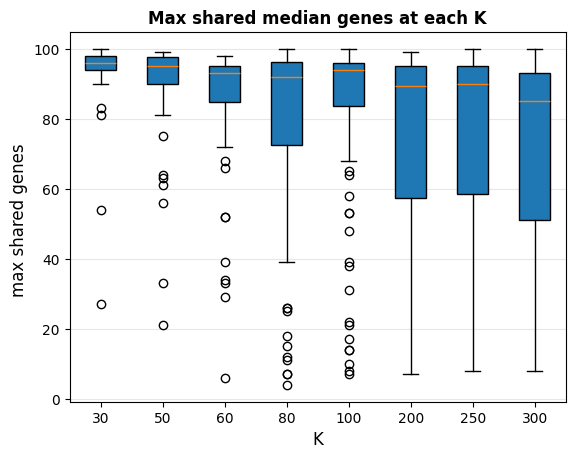

In [59]:
group_labels = list(shared_genes.keys())
data_lists = list(shared_genes.values())

box = plt.boxplot(data_lists,  labels=group_labels, patch_artist=True)
plt.title("Max shared median genes at each K", fontweight='bold')
plt.ylabel("max shared genes ", fontsize=12)
plt.xlabel("K", fontsize=12)
plt.grid(axis='y', alpha=0.3)

# cNMF programs barplot

In [ ]:
# plot cNMF programs barplot

sort_list = np.diag(sorted_overlap)

print("max shared gene is ", sort_list.max())

max_gene_values_barplot(sort_list, title="Maxinum shared genes between sk-cd and torch-halsvar", x_label="torch-halsvar Program", y_label="Shared Genes", figsize = (5,3))

# kmean quality

In [ ]:
local_neighborhood_size=0.30
density_threshold=2.0
n_neighbors = int(local_neighborhood_size * combined.shape[0]/k)
l2_spectra = (combined.T/np.sqrt((combined**2).sum(axis=1))).T

kmeans_model = KMeans(n_clusters=k, n_init=10, random_state=1)
kmeans_model.fit(l2_spectra)
kmeans_cluster_labels = pd.Series(kmeans_model.labels_+1, index=l2_spectra.index)

score = silhouette_score(l2_spectra, kmeans_cluster_labels)
sample_scores = silhouette_samples(l2_spectra, kmeans_cluster_labels)

cluster_scores = {}

for cluster in np.unique(kmeans_cluster_labels):
    cluster_scores[cluster] = sample_scores[kmeans_cluster_labels == cluster].mean()
    
values = list(cluster_scores.values())

In [ ]:
# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(values, sort_list, s=10)
plt.title("Silhouette Score vs max shared genes for batch halsvar 1e-7 at k=100")
plt.ylabel("Max shared genes")
plt.xlabel("Silhouette Score")

# Clustermap on NMF programs

In [13]:
output_dir_cd = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Results/sk-cNMF_evaluation/091425_100k_10iter_1000batiter_Htol_sk_cd_frobenius/"
name_cd = "091425_100k_10iter_1000batiter_Htol_sk_cd_frobenius_all"

output_dir_halsvar = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Results/torch-cNMF_evaluation/"
name_halsvar = "091425_100k_cells_10iter_torch_halsvar_batch"

# combine all NMF runs for k = 100
cnmf_obj_cd = cnmf.cNMF(output_dir=output_dir_cd, name=name_cd)
combined_cd = cnmf_obj_cd.combine_nmf(k)

cnmf_obj_halsv = cnmf.cNMF(output_dir=output_dir_halsvar, name=name_halsvar)
combined_halsv = cnmf_obj_halsv.combine_nmf(k)

Combining factorizations for k=100.


Combining factorizations for k=100.


In [19]:

output_dir_halsvar_mini = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Results/torch-cNMF_evaluation"
name_halsvar_mini = "091425_100k_cells_10iter_torch_halsvar_online_shuffled"

cnmf_obj_halsv_mini = cnmf.cNMF(output_dir=output_dir_halsvar_mini, name=name_halsvar_mini)
combined_halsv_mini = cnmf_obj_halsv_mini.combine_nmf(k)

Combining factorizations for k=100.


In [27]:
# calculate cor, distance, overlaps
#cor = program_corr(combined,combined)
#distance = program_euclidean(combined,combined)
overlap = top_genes_overlap(combined_halsv_mini,combined_cd,gene_num)

/home/users/ymo/.local/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/users/ymo/.local/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


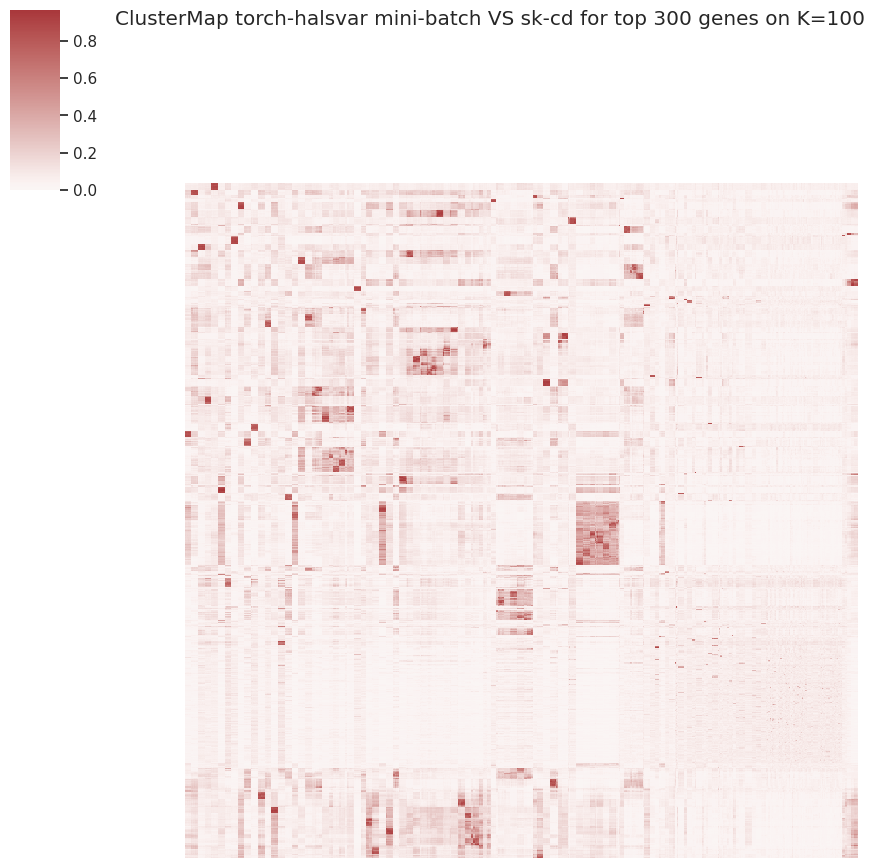

In [28]:
g3 = graph_cluster(overlap, save_file_name="ClusterMap torch-halsvar mini-batch VS sk-cd for top 300 genes on K=100")

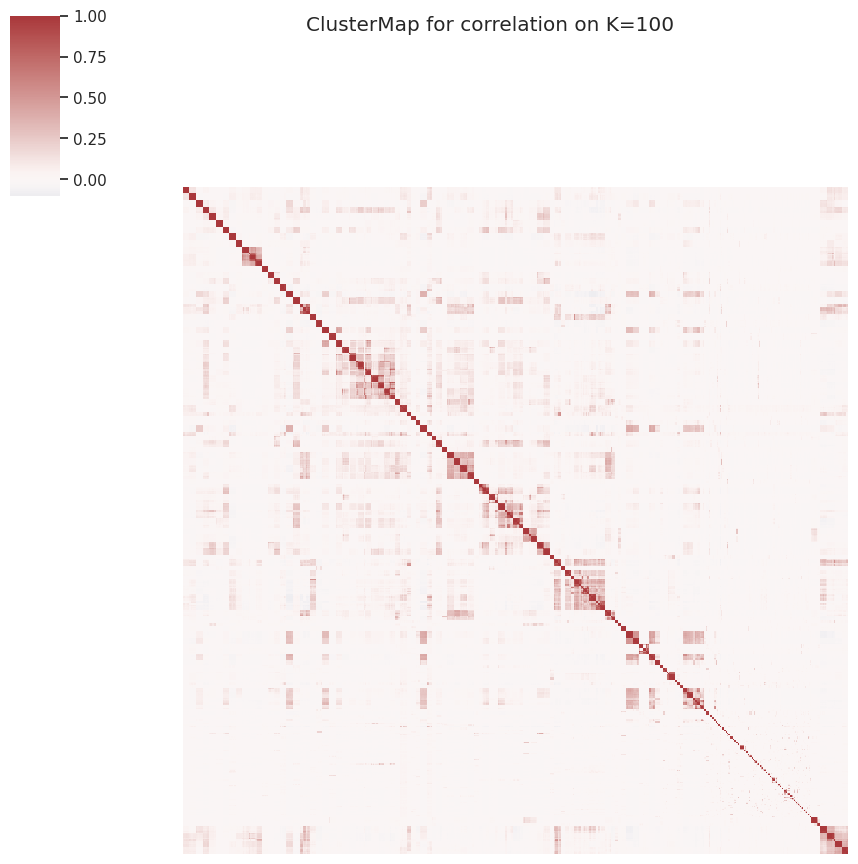

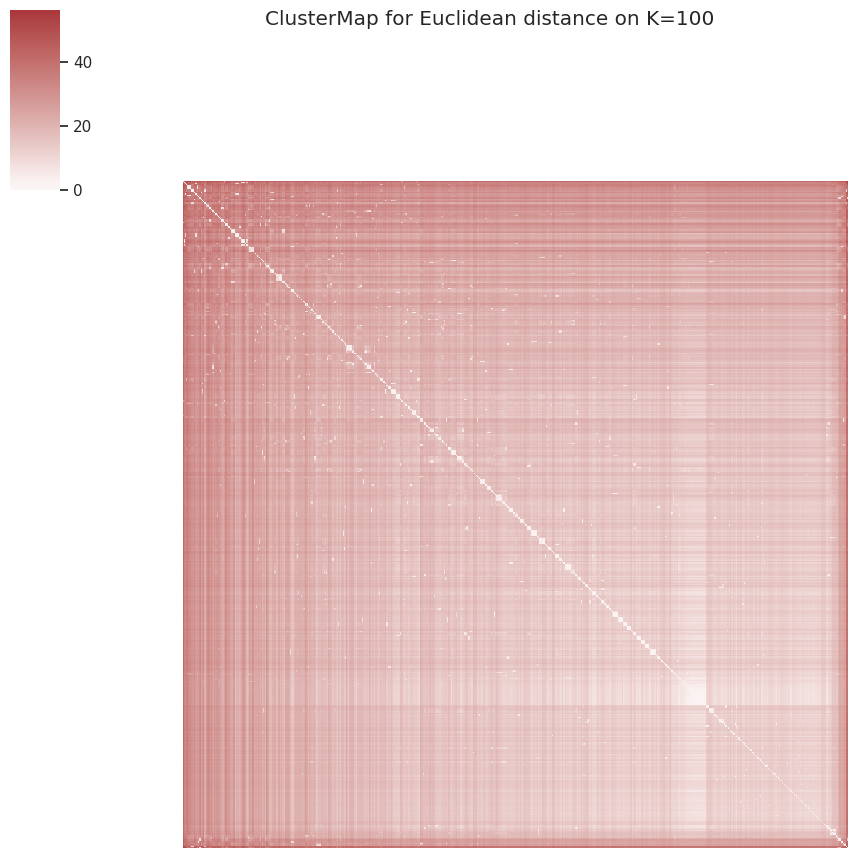

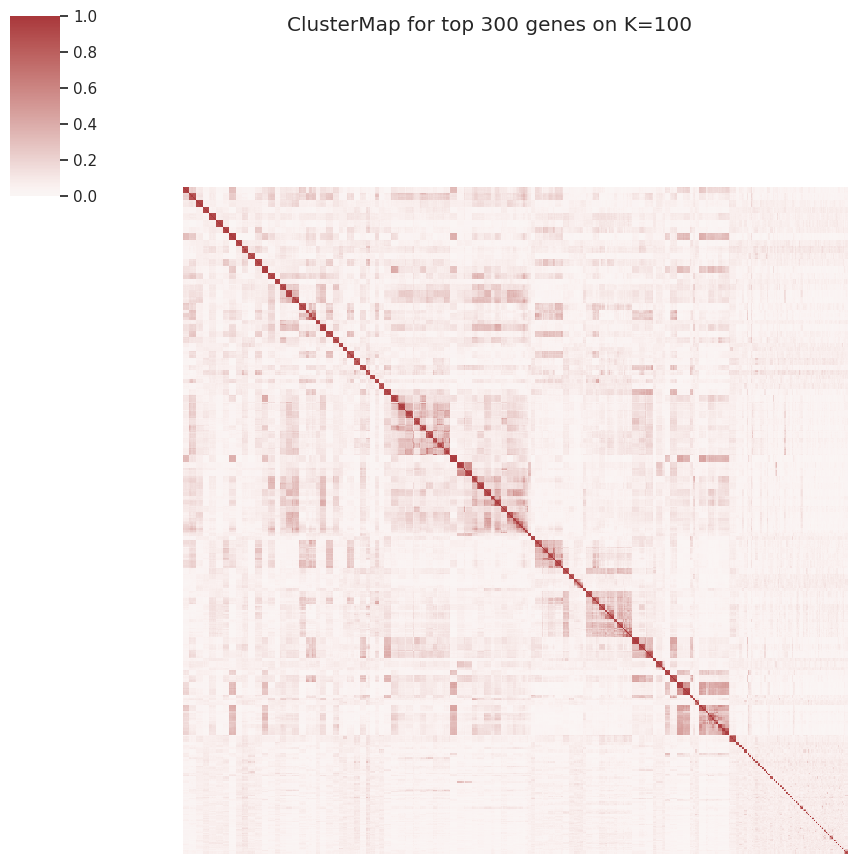

In [7]:
g1 = graph_cluster(cor, save_file_name="ClusterMap for correlation on K=100")
g2 = graph_cluster(distance, save_file_name="ClusterMap for Euclidean distance on K=100")
g3 = graph_cluster(overlap, save_file_name="ClusterMap for top 300 genes on K=100")

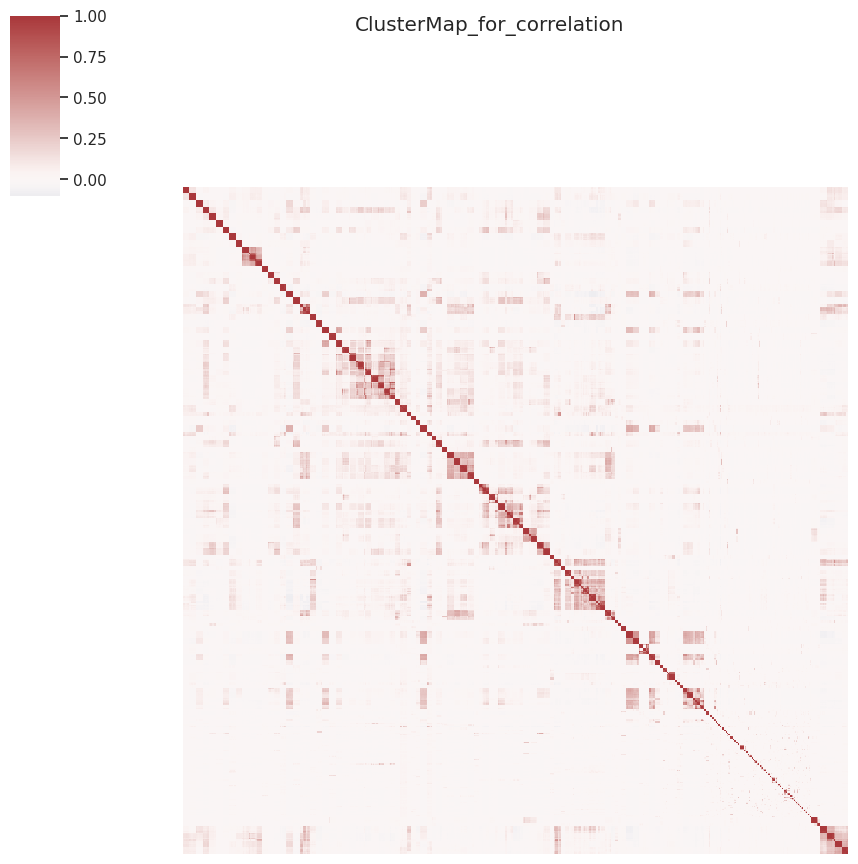

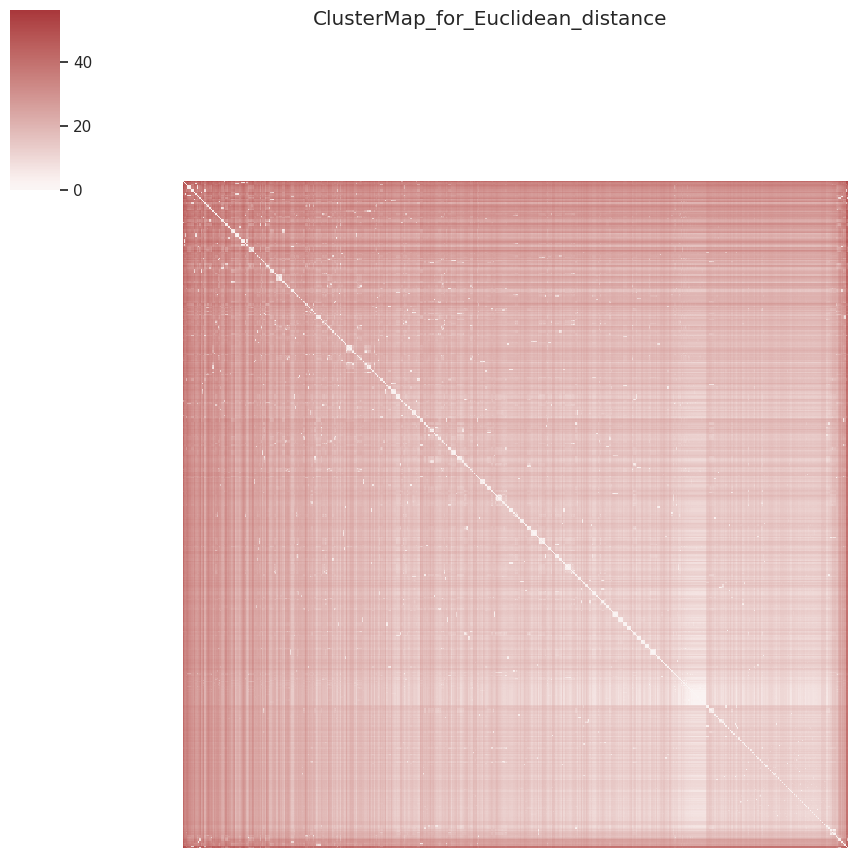

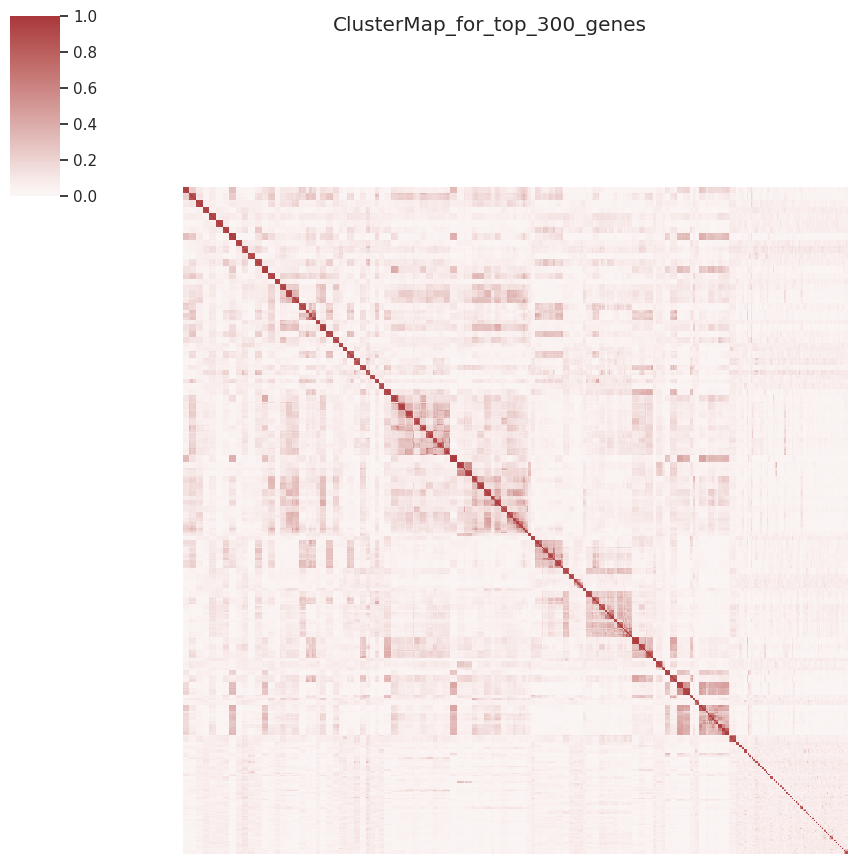

In [12]:
graph_pdf_clustermap(cor,distance,overlap,"/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Results/cNMF_100_07102024/consensus_NMF/Eval", "Program 0.pdf")

In [ ]:
''' debugging for heatmap
# graph heatmap base on the clustermap 
def graph_heatmap(g, r, c, folder_name = None , file_name = None, num_gene = 300, sorted = False):
    # g = clustermap
    # r,c dimension of calculating averages

    mat = g.data2d.to_numpy()  

    assert mat.shape[0] % r == 0 and mat.shape[1] % c == 0, \
           "Rows/cols must divide evenly by block size."

    n_row_blocks = mat.shape[0] // r
    n_col_blocks = mat.shape[1] // c

    """blocks = (mat.reshape(n_row_blocks, r, n_col_blocks, c)
            .swapaxes(1, 2)              
            .reshape(-1, r, c))"""

    blocks = (mat.reshape(r, r, r, r)
            .swapaxes(1, 2)              
            .reshape(-1, r, c))

    block_means = (blocks.mean(axis=(1, 2))).astype(int)
    plt.figure(figsize=(12, 8))
    sns.heatmap(block_means.reshape(10,10),annot=True, cmap='inferno_r',fmt='d')        
    plt.title("Heatmap for matching programs")

    if folder_name and file_name:
        g.savefig(f"{folder_name}/{file_name}.png")
 
    plt.show()

    # Sorted heatmap
    if sorted: 
        matrix = block_means.reshape(10,10).tolist()

        for i in range(len(matrix)):
            max_index = matrix[i].index(max(matrix[i]))
            # Swap max element with the diagonal element
            matrix[i][i], matrix[i][max_index] = matrix[i][max_index], matrix[i][i]

        plt.figure(figsize=(12, 8))
        sns.heatmap(np.array(matrix).reshape(r,c),annot=True, cmap='inferno_r',fmt='d')        
        plt.title("Sorted Heatmap for matching programs " + file_name)

        if folder_name and file_name:
            g.savefig(f"{folder_name}/{file_name}_sorted.png")
 
        plt.show()

cor = program_corr(combined,combined)
g1 = graph_cluster(cor, save_file_name="ClusterMap for correlation on K=100")
graph_heatmap(g1, 10, 10, num_gene = gene_num, sorted = True)
'''

# Graph kmean on cluster

In [4]:
# combine all NMF runs for k = 100
output_dir = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Results/cNMF_100_07102024"
run_name = "consensus_NMF"
k =100
cnmf_obj = cnmf.cNMF(output_dir = output_dir, name= run_name)
combined = cnmf_obj.combine_nmf(k)

overlap = top_genes_overlap(combined,combined,gene_num=300,percentage=False)


local_neighborhood_size=0.30
density_threshold=2.0
n_neighbors = int(local_neighborhood_size * combined.shape[0]/k)
l2_spectra = (combined.T/np.sqrt((combined**2).sum(axis=1))).T

kmeans_model = KMeans(n_clusters=k, n_init=10, random_state=1)
kmeans_model.fit(l2_spectra)
kmeans_cluster_labels = pd.Series(kmeans_model.labels_+1, index=l2_spectra.index)

Combining factorizations for k=100.


In [12]:
score = silhouette_score(l2_spectra, kmeans_cluster_labels)
sample_scores = silhouette_samples(l2_spectra, kmeans_cluster_labels)

cluster_scores = {}

for cluster in np.unique(kmeans_cluster_labels):
    cluster_scores[cluster] = sample_scores[kmeans_cluster_labels == cluster].mean()
    


In [18]:
values = list(cluster_scores.values())
keys = list(cluster_scores.keys())

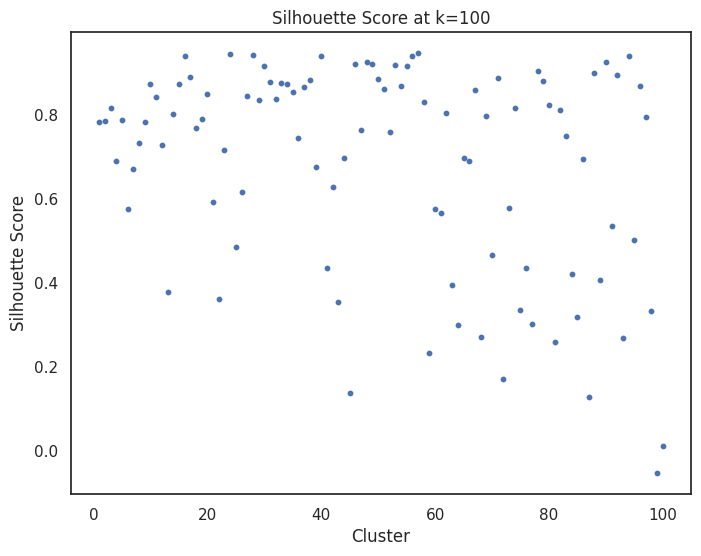

In [22]:
# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(keys, values, s=10)  # Swapped: keys (cluster) on x-axis, values (score) on y-axis
plt.title("Silhouette Score at k=100")
plt.xlabel("Cluster")  # Swapped labels too
plt.ylabel("Silhouette Score")
plt.show()

In [5]:
overlap.index = kmeans_cluster_labels.values
overlap.columns = kmeans_cluster_labels.values

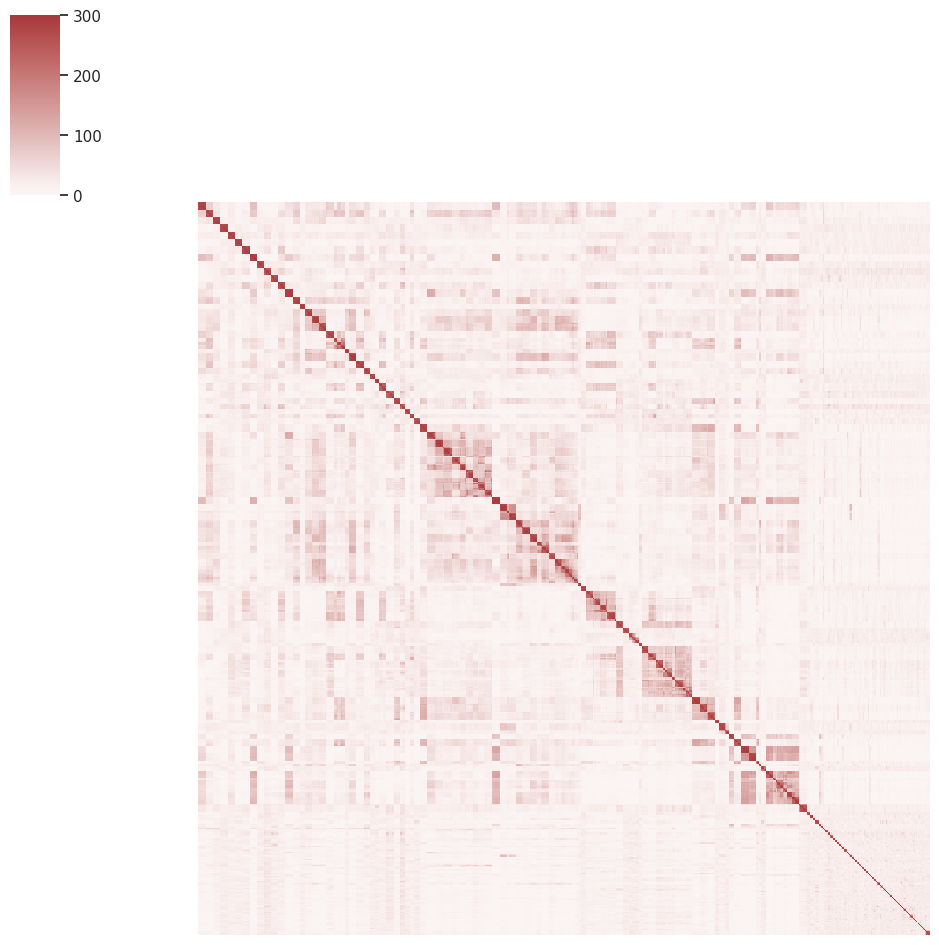

In [6]:
graph_cluster(overlap, figsize = (10,10))

In [8]:
palette

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.9682939613341975, 0.4449521541037412, 0.502681554961979),
 (0.9688001471602651, 0.4486661677799257, 0.4657645051942268),
 (0.9693205304597124, 0.4524474384122417, 0.4235093533325958),
 (0.9698600079214633, 0.4563290467075703, 0.37329452564779764),
 (0.9704241569984234, 0.4603475375001678, 0.3099359864545268),
 (0.9710194877714075, 0.4645444048369612, 0.21958695134807432),
 (0.9432571175715949, 0.4858297337787321, 0.19627813712865805),
 (0.9129194632825568, 0.5061236158165039, 0.1959743146264521),
 (0.8859561388376408, 0.5226505841897353, 0.1957148314100009),
 (0.8616090647292522, 0.536495730113334, 0.19548899031476086),
 (0.8393135149096066, 0.5483638183015401, 0.1952891752212395),
 (0.8186364435696062, 0.5587352208931429, 0.19510980216421525),
 (0.7992366176517394, 0.5679502874482604, 0.19494666966116514),
 (0.7808378773693458, 0.5762580853785418, 0.19479654118379955),
 (0.7632105624545804, 0.5838460616396939, 0.19465686802007023),
 (0.7461581399425343, 0.5908588842337321, 0.19452559991106833),
 (0.729507186466474, 0.5974108553650256, 0.19440105212898393),
 (0.7130995200796869, 0.603594357208924, 0.19428180969567224),
 (0.6967856488918167, 0.6094857716505745, 0.1941666564766089),
 (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 (0.6638497942669026, 0.6206423963955671, 0.193944434364614),
 (0.6469198885248283, 0.6260136954691768, 0.1938354940106293),
 (0.6294549504383264, 0.6313094806780026, 0.19372683453729503),
 (0.6112562547547398, 0.6365730658187477, 0.1936175993332644),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.5716670596102353, 0.6471729545545385, 0.1933938554082785),
 (0.5496278799062962, 0.652596106555733, 0.19327742502069384),
 (0.5254974984747257, 0.6581636763063526, 0.1931565065536415),
 (0.49862995317502606, 0.6639281765667906, 0.19302982239856423),
 (0.46810256823426116, 0.6699492535792404, 0.19289587399044988),
 (0.43251552772443846, 0.6762964064441414, 0.19275286343588344),
 (0.3895605218334725, 0.6830525701397582, 0.19259858664036306),
 (0.3349123067396974, 0.6903189852056115, 0.19243028365232387),
 (0.2583652459502072, 0.6982220070105303, 0.19224442351096047),
 (0.19316929744982803, 0.7018418078239693, 0.24321388407365968),
 (0.1952419354731103, 0.6990773163585398, 0.32344574679946075),
 (0.1970282015947445, 0.6966573070264102, 0.3777220811778649),
 (0.19859528420184464, 0.6945052315073723, 0.4188637990761522),
 (0.1999916314143737, 0.6925644704524734, 0.45197028257617916),
 (0.20125317221201128, 0.6907920815379025, 0.47966761189275336),
 (0.20240722638775788, 0.6891547381195408, 0.5035059989223365),
 (0.20347505050756443, 0.6876260074052308, 0.5244833910517103),
 (0.20447354824651226, 0.6861844740378025, 0.5432827721227443),
 (0.2054164524111189, 0.6848124115790541, 0.5603939330074446),
 (0.20631516405196249, 0.6834948167725491, 0.5761817437653648),
 (0.2071793642843855, 0.6822186877835893, 0.5909270920390571),
 (0.20801747320100067, 0.6809724677834178, 0.6048527893858368),
 (0.2088370052633693, 0.679745600038306, 0.618140731539243),
 (0.20964485513246672, 0.6785281560863641, 0.6309437466865638),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.21125140522513897, 0.6760830215342485, 0.6556099802889619),
 (0.21206284378993928, 0.6748357481451457, 0.667700389303737),
 (0.21288848474779976, 0.6735580963671082, 0.6797695506404706),
 (0.21373542361363407, 0.6722384572623264, 0.6919206371645797),
 (0.21461147568939787, 0.6708637556281021, 0.7042594890626992),
 (0.21552548442988734, 0.6694188876970714, 0.7168985022454705),
 (0.2164877105607646, 0.6678859906840182, 0.7299610244322734),
 (0.21751034075242276, 0.666243464170332, 0.7435866500315722),
 (0.2186081730362054, 0.6644646222710646, 0.7579379391094441),
 (0.21979956608283252, 0.6625157876850336, 0.7732093159317208),
 (0.2211077892375572, 0.6603535235959728, 0.7896392897777976),
 (0.22256299530204293, 0.6579204976527576, 0.8075277991007

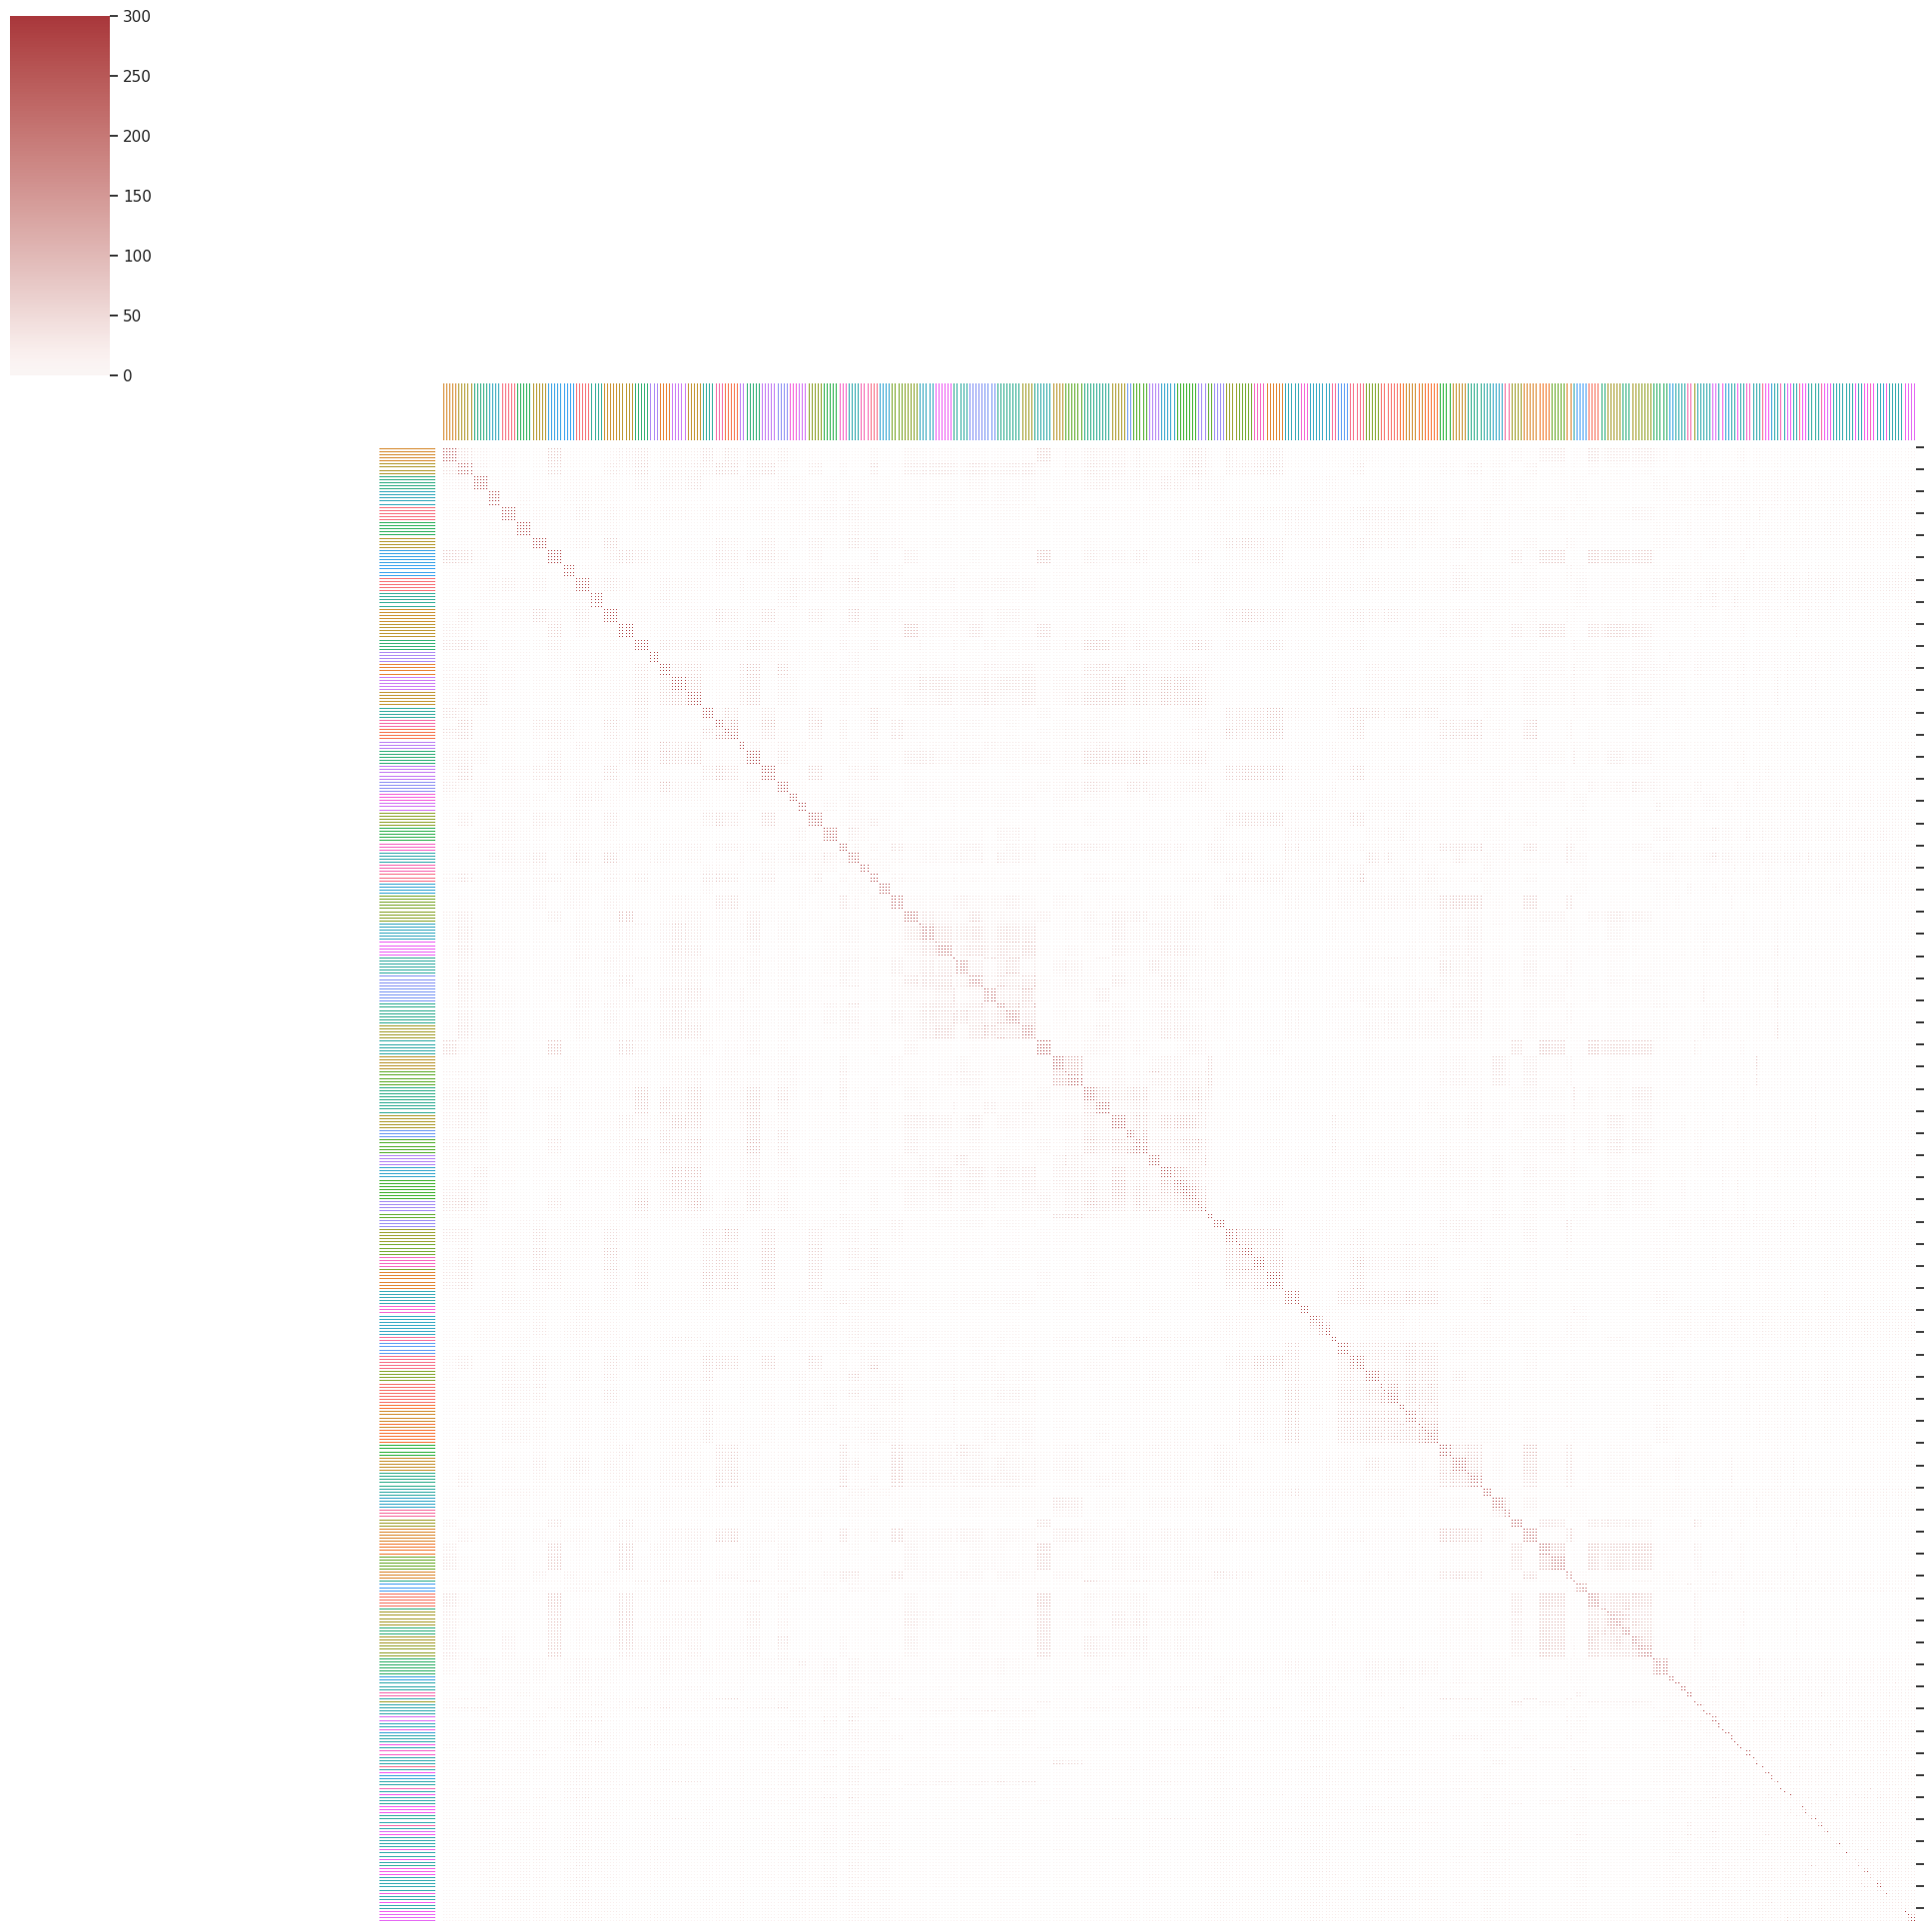

In [7]:
palette = sns.color_palette("husl", n_colors=overlap.index.nunique())
lut = dict(zip(overlap.columns.unique(), palette))
row_colors = overlap.index.map(lut)

g = sns.clustermap(
        overlap,
        cmap="vlag",                       # diverging palette centred at 0
        linewidths=.5,                     # grid lines
        center=0,                          # keep 0 in the middle of the colour range
        metric="euclidean",                # distance metric for clustering
        method= "single",                    # linkage method
        figsize=(20,20),                  # size in inches
        row_colors=row_colors,            # color axis 
        col_colors = row_colors,          # color axis 
        row_cluster=True,
        col_cluster=True
)

g.ax_heatmap.set_xticklabels([])
g.ax_heatmap.set_yticklabels([])


# Remove dendrograms
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
